In [53]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [54]:
np.random.seed(666)
def generate_data(n, b0, b):
    X = np.random.normal(0, 1, (n, 5))
    p = 1 / (1 + np.exp(-(b0+np.sum(b*X, axis=1))))
    y = np.random.binomial(1, p)
    return X, y


In [55]:
def conduct_experiment_with_mse(n, L, b_array, is_number_of_samples_limited = False):
    mse_app = []
    for _ in range(L):
        X, y = generate_data(n, 0.5, 1)
        if is_number_of_samples_limited:
            s = X.shape
            X = X[:,:3]
            b_array = b_array[:,:3]
        model = LogisticRegression(penalty='l2', C=1000)
        model.fit(X, y)
        b_hat = model.coef_
        b_hat.shape
        mse = mean_squared_error(b_array, b_hat)
        mse_app.append(mse)
    mse_app = np.array(mse_app)
    mse_avg = np.mean(mse_app)
    return mse_avg
L = 100
conduct_experiment_with_mse(50, 100,b_array = np.full((1, 5), 1))

1.9392272401638109

In [56]:
n_values_for_experiment = [50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000]

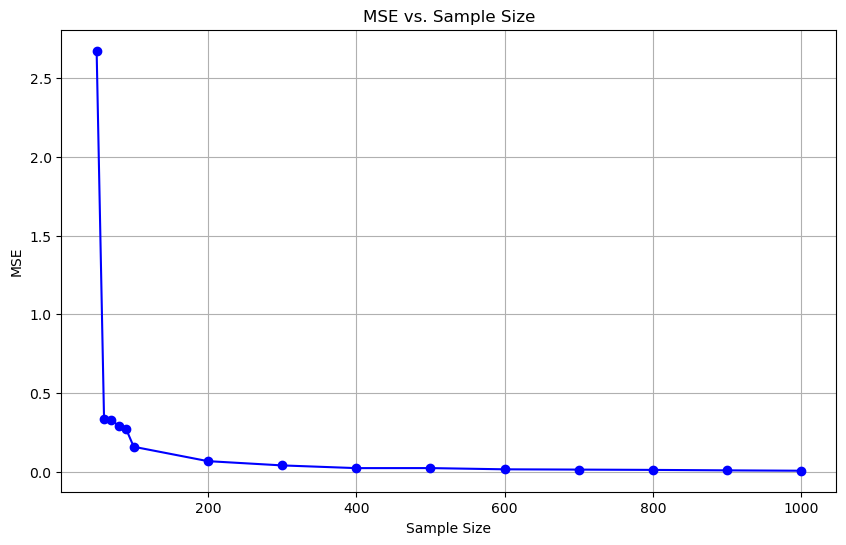

In [57]:

different_mse_values = []
for n_value in n_values_for_experiment:
    mse = conduct_experiment_with_mse(n_value, 100,b_array = np.full((1, 5), 1))
    different_mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(n_values_for_experiment, different_mse_values, marker='o', linestyle='-', color='blue')
plt.title('MSE vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

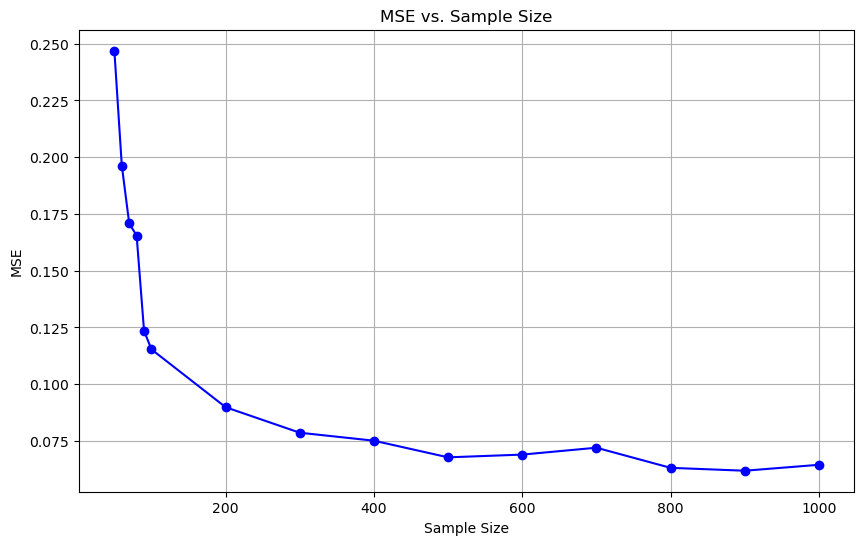

In [58]:

different_mse_values_v2 = []
for n_value in n_values_for_experiment:
    mse = conduct_experiment_with_mse(n_value, 100,b_array = np.full((1, 5), 1), is_number_of_samples_limited = True)
    different_mse_values_v2.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(n_values_for_experiment, different_mse_values_v2, marker='o', linestyle='-', color='blue')
plt.title('MSE vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

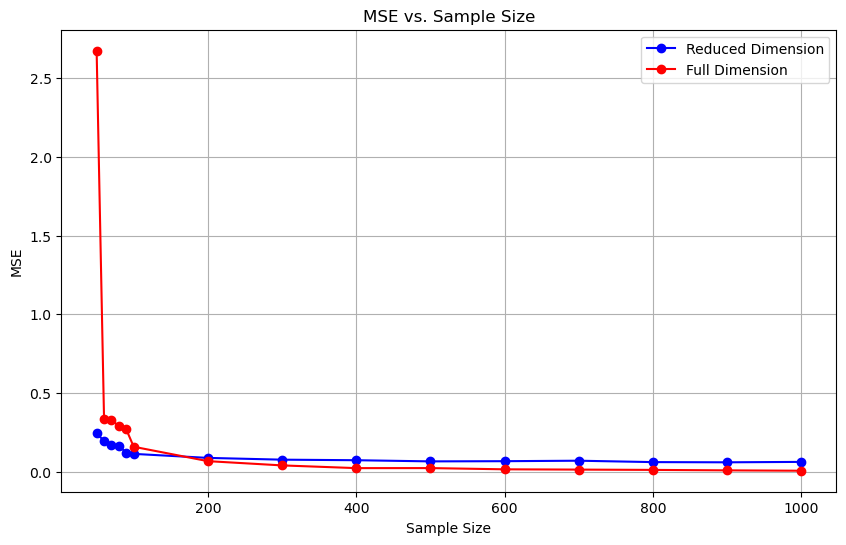

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(n_values_for_experiment, different_mse_values_v2, marker='o', linestyle='-', color='blue')
plt.plot(n_values_for_experiment, different_mse_values, marker='o', linestyle='-', color='red')
plt.title('MSE vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('MSE')
plt.legend(['Reduced Dimension', 'Full Dimension'])
plt.grid(True)
plt.show()